<a href="https://colab.research.google.com/github/hvoleti/Parkinson-Detection/blob/main/ParkinsonDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DETECTING PARKINSON DISEASE


## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

##Importing the dataset

In [2]:
dataset = pd.read_csv('/content/parkinsons.data')
dataset.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

## Attribute Information:

Name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),  MDVP:Jitter(Abs),  MDVP:RAP,  MDVP:PPQ,  Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,  MDVP:Shimmer(dB),  Shimmer:APQ3,  Shimmer:APQ5,  MDVP:APQ,  Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR- Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1, spread2, PPE - Three nonlinear measures of fundamental frequency variation

##Checking null values and datatypes

In [3]:
dataset.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [4]:
dataset.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

## Displaying Label Inbalance

AxesSubplot(0.125,0.125;0.775x0.755)


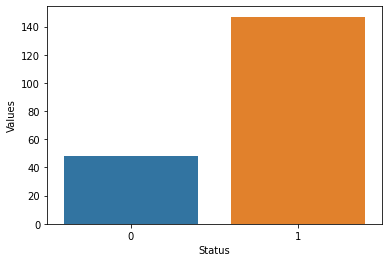

In [5]:
temp = dataset["status"].value_counts()
temp_dataset = pd.DataFrame({'Status' : temp.index, 'Values': temp.values})
print(sns.barplot(x = 'Status', y="Values", data=temp_dataset))

## Plotting the distribution

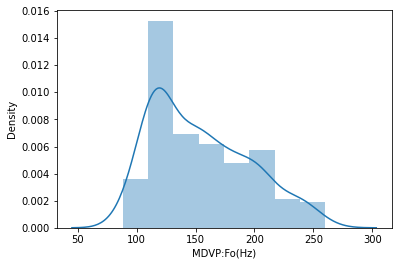

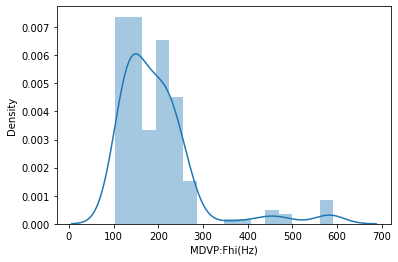

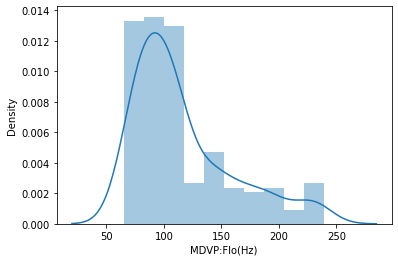

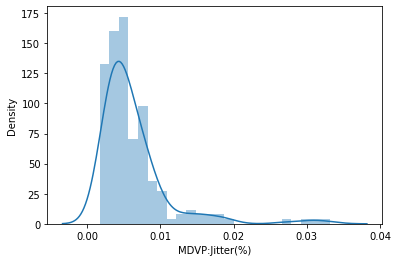

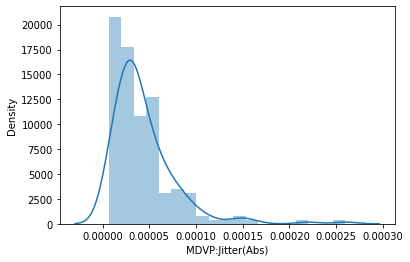

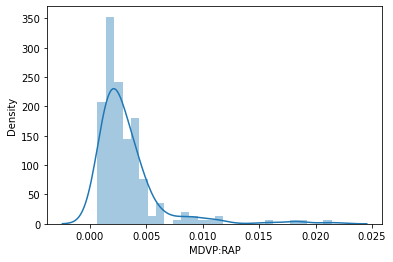

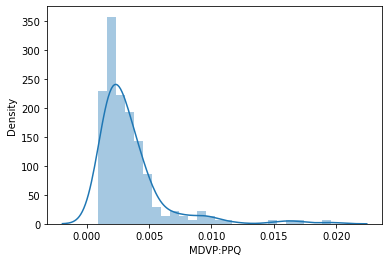

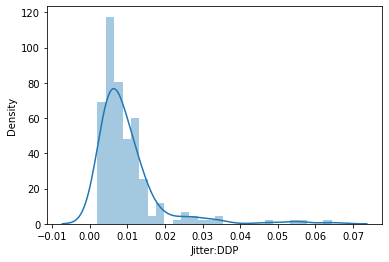

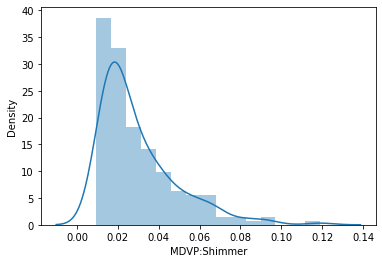

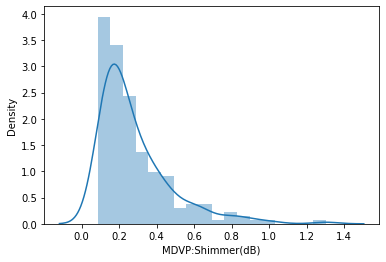

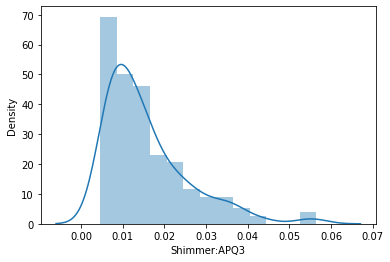

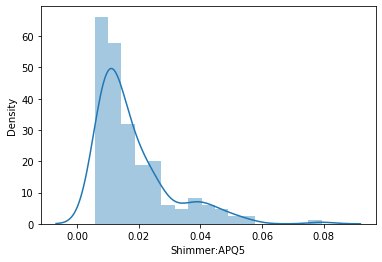

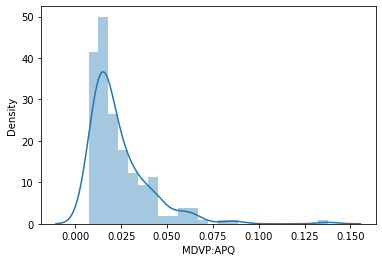

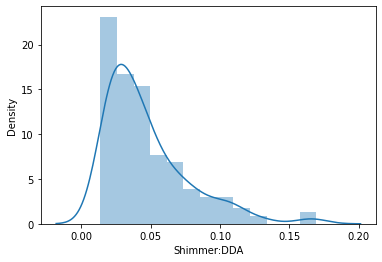

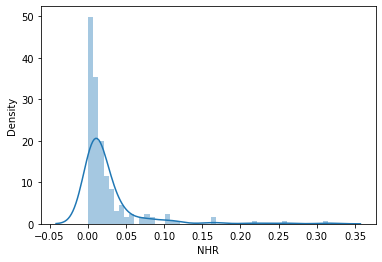

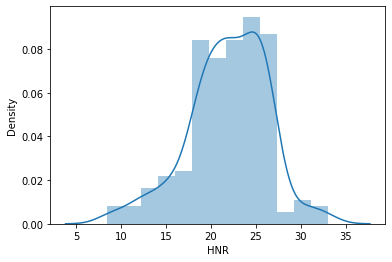

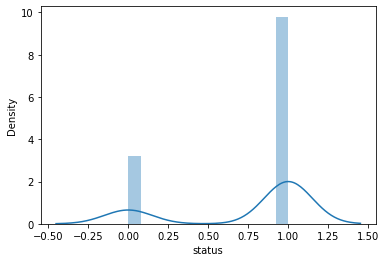

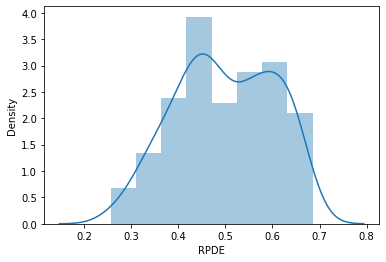

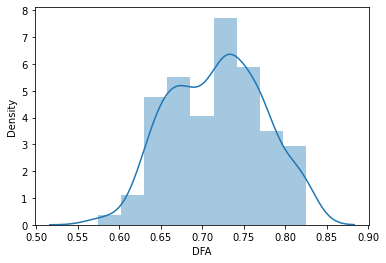

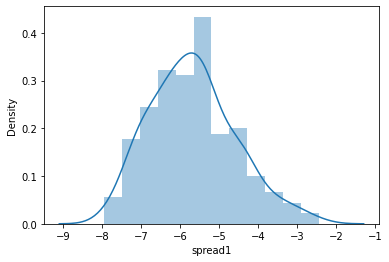

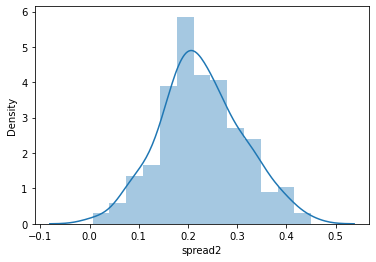

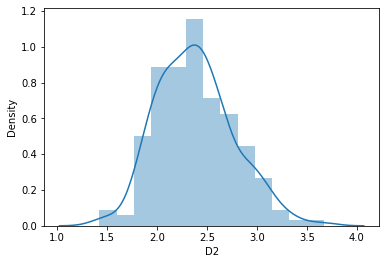

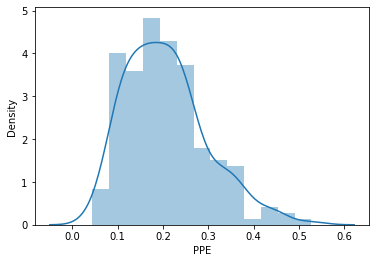

In [6]:
def distplots(col):
  sns.distplot(dataset[col])
  plt.show()

for i in list(dataset.columns)[1:]:
  distplots(i)

## Correlation

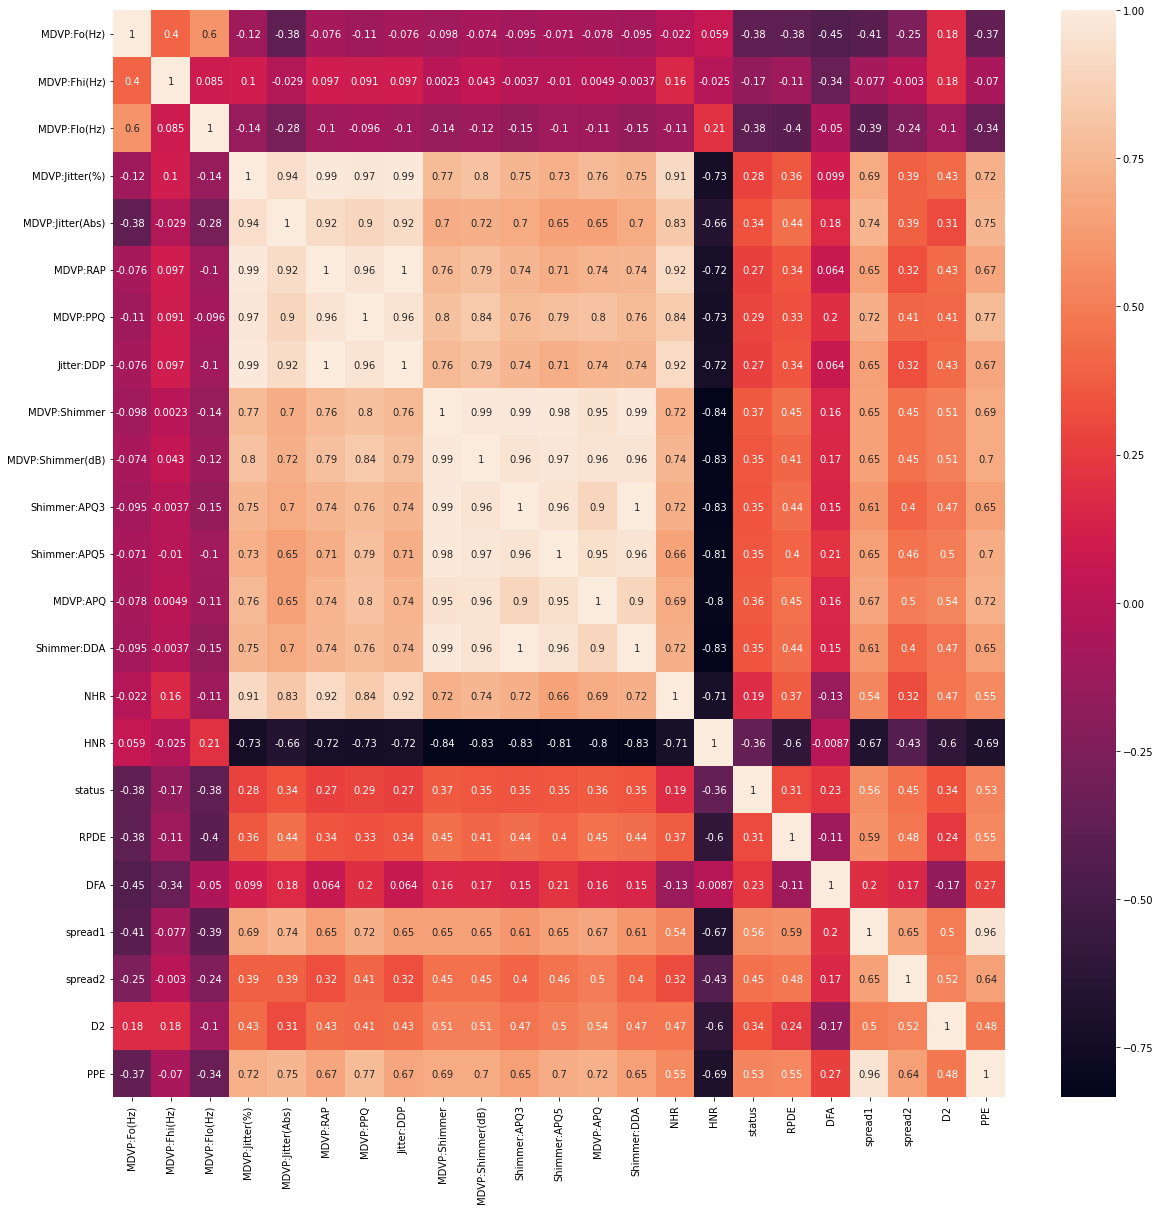

In [7]:
plt.figure(figsize=(20,20))
corr = dataset.corr()
sns.heatmap(corr,annot= True)

## Data

In [8]:
X=dataset.drop(["status","name"],axis=1)
y=dataset["status"]

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

##Splitting the training and test data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)

## Feature Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler((-1,1))
X_train= mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [13]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))


# Lets balance the labels

ros = RandomOverSampler()

X_new, y_new = ros.fit_resample(X, y)
print(Counter(y_new))

Counter({1: 147, 0: 48})
Counter({1: 147, 0: 147})


## Applying the models on the data

In [14]:
from sklearn.metrics import accuracy_score

Applying Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
classifier1.fit(X_train, y_train)

pred_lr = classifier1.predict(X_test)
#Accuracy 
accuracy_lr = accuracy_score(y_test,pred_lr)

Applying KNN


In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 3,metric = 'minkowski',p=2)
classifier2.fit(X_train, y_train)

pred_knn = classifier2.predict(X_test)
#Accuracy
accuracy_knn = accuracy_score(y_test,pred_knn)

Applying SVM

In [17]:
from sklearn.svm import SVC
classifier3 = SVC(random_state=0)
classifier3.fit(X_train, y_train)
               
pred_svm = classifier3.predict(X_test)
#Accuracy
accuracy_svm = accuracy_score(y_test,pred_svm)

Applying Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(X_train, y_train)

pred_gnb = classifier4.predict(X_test)
#Accuracy
accuracy_gnb = accuracy_score(y_test,pred_gnb)

Applying Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier5 = DecisionTreeClassifier()
classifier5.fit(X_train,y_train)

pred_dt = classifier5.predict(X_test)
#Accuracy
accuracy_dt = accuracy_score(y_test,pred_dt)

Applying Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier6 = RandomForestClassifier(criterion='entropy')
classifier6.fit(X_train, y_train)

pred_rf = classifier6.predict(X_test)
#Accuracy
accuracy_rf = accuracy_score(y_test, pred_rf)

## Evaluating the models

            Model Used  Accuracy
0  Logistic Regression  0.846154
1                  KNN  0.974359
2                  SVM  0.923077
3          Naive Bayes  0.794872
4        Decision Tree  0.948718
5        Random Forest  0.974359
AxesSubplot(0.125,0.125;0.775x0.755)


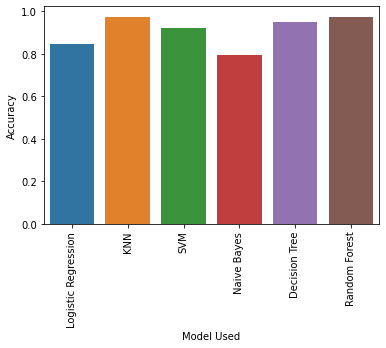

In [21]:
list1=['Logistic Regression','KNN','SVM','Naive Bayes','Decision Tree','Random Forest']
list2=[accuracy_lr,accuracy_knn,accuracy_svm,accuracy_gnb,accuracy_dt,accuracy_rf]
list3=[classifier1,classifier2,classifier3,classifier4,classifier5,classifier6]

df_Accuracy=pd.DataFrame({'Model Used': list1, 'Accuracy': list2})
print(df_Accuracy)

chart=sns.barplot(x='Model Used',y='Accuracy',data=df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)


## XG Boost

In [22]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_train,y_train)

pred_xgb = classifier_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test,pred_xgb)
print(accuracy_xgb)

0.9743589743589743


In [23]:
from sklearn.metrics import confusion_matrix , classification_report
cm = confusion_matrix(y_test,pred_xgb)
print(classification_report(y_test, pred_xgb)) 
print(cm) 

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.97      1.00      0.98        32

    accuracy                           0.97        39
   macro avg       0.98      0.93      0.95        39
weighted avg       0.98      0.97      0.97        39

[[ 6  1]
 [ 0 32]]


## Confusion Matrix and Classification Report for the Models

In [24]:
for i in list3:
  print("------------ " , i , "---------------")
  print (classification_report(y_test,i.predict(X_test)))
  cm = confusion_matrix ( y_test, i.predict(X_test))
  print(cm)
  print("    ")

------------  LogisticRegression(C=0.4, max_iter=1000, solver='liblinear') ---------------
              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39

[[ 3  4]
 [ 2 30]]
    
------------  KNeighborsClassifier(n_neighbors=3) ---------------
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.97      1.00      0.98        32

    accuracy                           0.97        39
   macro avg       0.98      0.93      0.95        39
weighted avg       0.98      0.97      0.97        39

[[ 6  1]
 [ 0 32]]
    
------------  SVC(random_state=0) ---------------
              precision    recall  f1-score   support

           0       1.00      0.57   

## Using ROC to compare the models

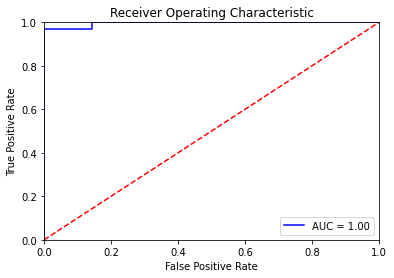


------------------ROC FOR  Logistic Regression  + PCA ---------------------------


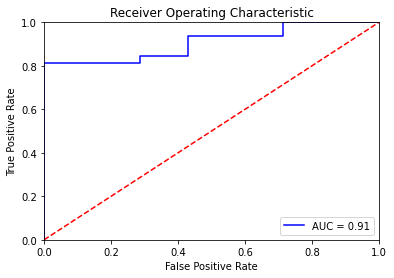



------------------ROC FOR  KNN  + PCA ---------------------------


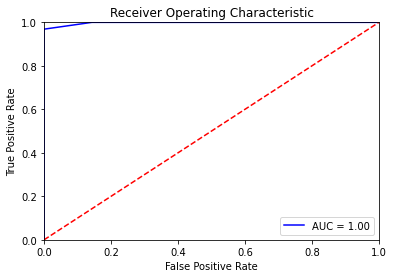



------------------ROC FOR  SVM  + PCA ---------------------------
ROC Not Valid

------------------ROC FOR  Naive Bayes  + PCA ---------------------------


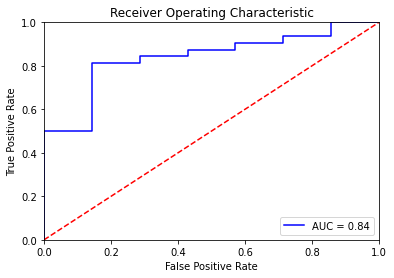



------------------ROC FOR  Decision Tree  + PCA ---------------------------


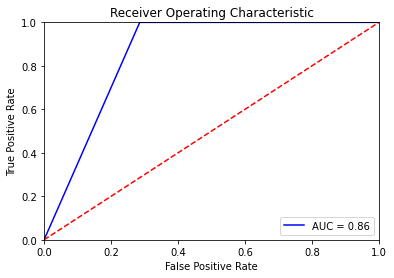



------------------ROC FOR  Random Forest  + PCA ---------------------------


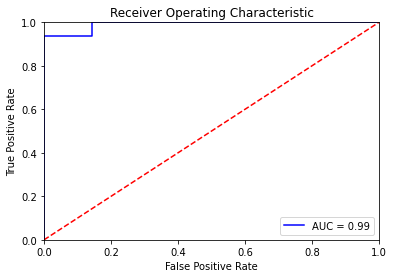

In [25]:

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score


def plot_roc(model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probabilities = model.predict_proba(np.array(X_test))
    predictions = probabilities
    fpr, tpr, threshold = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plot_roc(classifier_xgb, X_test, y_test)



for i in range(0,len(list3)):
    try:
        print()
        print("------------------ROC FOR ",list1[i]," + PCA ---------------------------")
        plot_roc(list3[i], X_test, np.array(y_test))
        print()
    except:
        print("ROC Not Valid")